# Imports

In [166]:
import pandas as pd
import numpy as np
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from xgboost import plot_importance
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

# Data

In [54]:
df = pd.read_csv("full_devices.csv", encoding='latin-1')

In [55]:
df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


## Data Analysis

In [158]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,device_id
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524,622.379191
std,0.029167,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623,327.177800
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000,378.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000,602.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000,917.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000,1168.000000


In [56]:
len(df['device'].unique())

1169

In [57]:
df.sort_values(['device','date'], ascending=[True,True])

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1163,2015-01-02,S1F01085,0,1650864,56,0,52,6,407438,0,0,7
2326,2015-01-03,S1F01085,0,124017368,56,0,52,6,407438,0,0,7
3489,2015-01-04,S1F01085,0,128073224,56,0,52,6,407439,0,0,7
4651,2015-01-05,S1F01085,0,97393448,56,0,52,6,408114,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
65334,2015-04-02,Z1F2PBHX,0,180917784,0,0,0,5,162645,0,0,0
65819,2015-04-03,Z1F2PBHX,0,33952520,0,0,0,5,162645,0,0,0
66304,2015-04-04,Z1F2PBHX,0,59053184,0,0,0,5,162645,0,0,0
66789,2015-04-05,Z1F2PBHX,0,110545440,0,0,0,5,163047,0,0,0


In [58]:
df[df['failure']==1]

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
4885,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
6879,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3
8823,2015-01-09,W1F0PNA5,1,136429411,64784,0,406,30,224801,8,8,0
11957,2015-01-13,W1F13SRV,1,188251248,2040,0,0,6,39345,32,32,1
12668,2015-01-14,W1F1230J,1,220461296,0,0,0,14,325125,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
109927,2015-08-04,W1F1CB5E,1,16043296,88,0,0,9,30,0,0,0
114251,2015-08-18,Z1F0MRPJ,1,65654088,0,0,0,9,298592,0,0,11
122118,2015-10-05,S1F0JGJV,1,13739704,0,0,18,8,343760,0,0,0
122808,2015-10-09,Z1F14BGY,1,85259320,0,0,164,8,262932,0,0,0


In [59]:
df.columns

Index(['date', 'device', 'failure', 'attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9'],
      dtype='object')

## Feature Engineering

In [61]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['device'])
 
# printing label
label

array([   0,    2,    3, ..., 1075, 1081, 1082])

In [62]:
label[0:10]

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [63]:
le.inverse_transform([0])

array(['S1F01085'], dtype=object)

In [64]:
df['device_id'] = label

In [66]:
df[['date', 'device','device_id', 'attribute1', 'attribute2', 'attribute3',       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8', 'attribute9']]

,date,device,device_id,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,2,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,3,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,4,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,5,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,1045,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,1068,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,1075,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,1081,226953408,0,0,0,12,358980,0,0,0


In [67]:
df.sort_values(['device','date'], ascending=[True,True])

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,device_id
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,0
1163,2015-01-02,S1F01085,0,1650864,56,0,52,6,407438,0,0,7,0
2326,2015-01-03,S1F01085,0,124017368,56,0,52,6,407438,0,0,7,0
3489,2015-01-04,S1F01085,0,128073224,56,0,52,6,407439,0,0,7,0
4651,2015-01-05,S1F01085,0,97393448,56,0,52,6,408114,0,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65334,2015-04-02,Z1F2PBHX,0,180917784,0,0,0,5,162645,0,0,0,1168
65819,2015-04-03,Z1F2PBHX,0,33952520,0,0,0,5,162645,0,0,0,1168
66304,2015-04-04,Z1F2PBHX,0,59053184,0,0,0,5,162645,0,0,0,1168
66789,2015-04-05,Z1F2PBHX,0,110545440,0,0,0,5,163047,0,0,0,1168


In [34]:
print((len(df[df['failure']==1]) * 100) / len(df))

0.0851446656063746


## Split Data Train and Test

In [139]:
X_train, X_test, y_train, y_test = train_test_split(df[['device_id', 'attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8', 'attribute9']], df[['failure']], test_size=0.3, random_state=0, stratify=df['failure'])

In [140]:
X_train.dtypes

device_id     int32
attribute1    int64
attribute2    int64
attribute3    int64
attribute4    int64
attribute5    int64
attribute6    int64
attribute7    int64
attribute8    int64
attribute9    int64
dtype: object

In [141]:
print((len(y_train[y_train['failure']==1]) * 100) / len(y_train))

0.08491594468988467


# Models Without Lookback

## XGboost Classifier

In [232]:
model1 = xgb.XGBClassifier(n_estimators=100, max_depth=20, learning_rate=0.1, subsample=0.5)

In [233]:
train_model1 = model1.fit(X_train, y_train)

In [234]:
pred1 = train_model1.predict(X_test)

In [235]:
pred1

array([0, 0, 0, ..., 0, 0, 0])

In [236]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37317
           1       0.50      0.03      0.06        32

    accuracy                           1.00     37349
   macro avg       0.75      0.52      0.53     37349
weighted avg       1.00      1.00      1.00     37349



In [237]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, pred1)
confusion_matrix

array([[37316,     1],
       [   31,     1]], dtype=int64)

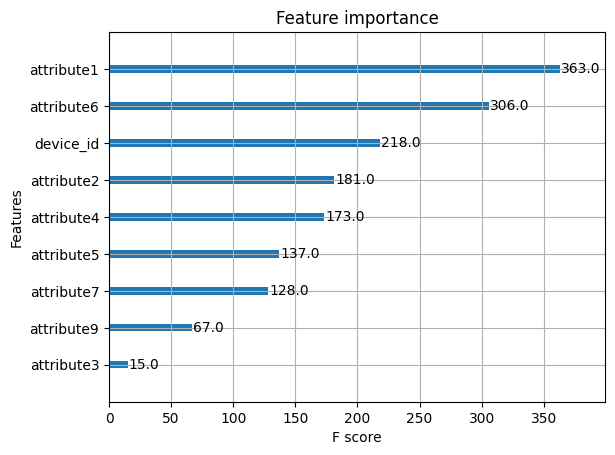

In [199]:
plot_importance(model1, max_num_features=10) # top 10 most important features
plt.show()

## SVM

In [317]:
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)

C:\Users\flavi\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [319]:
pred_svm = clf_svm.predict(X_test)
print(classification_report(y_test, pred_svm))
print(sklearn.metrics.confusion_matrix(y_test, pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37317
           1       0.00      0.00      0.00        32

    accuracy                           1.00     37349
   macro avg       0.50      0.50      0.50     37349
weighted avg       1.00      1.00      1.00     37349

[[37317     0]
 [   32     0]]


C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SGD

In [339]:
clf_SGD = SGDClassifier(loss="hinge", max_iter=10)
clf_SGD.fit(X_train, y_train)

C:\Users\flavi\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\flavi\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=10)

In [340]:
pred_SGD = clf_SGD.predict(X_test)
print(classification_report(y_test, pred_SGD))
print(sklearn.metrics.confusion_matrix(y_test, pred_SGD))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37317
           1       0.00      0.00      0.00        32

    accuracy                           1.00     37349
   macro avg       0.50      0.50      0.50     37349
weighted avg       1.00      1.00      1.00     37349

[[37317     0]
 [   32     0]]


C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN

In [342]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)

C:\Users\flavi\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [343]:
pred_neigh = neigh.predict(X_test)
print(classification_report(y_test, pred_neigh))
print(sklearn.metrics.confusion_matrix(y_test, pred_neigh))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37317
           1       0.00      0.00      0.00        32

    accuracy                           1.00     37349
   macro avg       0.50      0.50      0.50     37349
weighted avg       1.00      1.00      1.00     37349

[[37317     0]
 [   32     0]]


C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Tree

In [352]:
clf_tree = DecisionTreeClassifier(random_state=0)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [353]:
pred_tree = clf_tree.predict(X_test)
print(classification_report(y_test, pred_tree))
print(sklearn.metrics.confusion_matrix(y_test, pred_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37317
           1       0.00      0.00      0.00        32

    accuracy                           1.00     37349
   macro avg       0.50      0.50      0.50     37349
weighted avg       1.00      1.00      1.00     37349

[[37297    20]
 [   32     0]]


## MLP

In [167]:
X_train.shape

(87145, 10)

In [253]:
keras.backend.clear_session()

In [189]:
model = Sequential()
model.add(Dense(10, input_shape=(10, ), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [190]:
es = EarlyStopping(monitor='loss', mode='min', patience=5)

In [191]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, validation_split=0.2,callbacks=[es])

Epoch 1/100
2179/2179 [==============================] - 3s 1ms/step - loss: 2530933.5000 - accuracy: 0.9067 - val_loss: 648.1241 - val_accuracy: 0.9993
Epoch 2/100
2179/2179 [==============================] - 2s 1ms/step - loss: 277.0414 - accuracy: 0.9985 - val_loss: 188.0168 - val_accuracy: 0.9993
Epoch 3/100
2179/2179 [==============================] - 3s 1ms/step - loss: 1076.6232 - accuracy: 0.9982 - val_loss: 599.2923 - val_accuracy: 0.9993
Epoch 4/100
2179/2179 [==============================] - 2s 1ms/step - loss: 2541.7114 - accuracy: 0.9983 - val_loss: 1758.5281 - val_accuracy: 0.9993
Epoch 5/100
2179/2179 [==============================] - 2s 1ms/step - loss: 2452.9409 - accuracy: 0.9985 - val_loss: 421.9216 - val_accuracy: 0.9993
Epoch 6/100
2179/2179 [==============================] - 2s 1ms/step - loss: 2070.0300 - accuracy: 0.9982 - val_loss: 2094.2393 - val_accuracy: 0.9993
Epoch 7/100
2179/2179 [==============================] - 2s 1ms/step - loss: 2022.9888 - accurac

In [192]:
pred2 = model.predict(X_test)

1168/1168 [==============================] - 1s 933us/step


In [193]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37317
           1       0.00      0.00      0.00        32

    accuracy                           1.00     37349
   macro avg       0.50      0.50      0.50     37349
weighted avg       1.00      1.00      1.00     37349



C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [198]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, pred2)
confusion_matrix

array([[37317,     0],
       [   32,     0]], dtype=int64)

# A new approach using lookback (looking 'n' day previously)

## Data Prepare

In [201]:
df = df.sort_values(['device','date'], ascending=[True,True])

In [202]:
df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,device_id
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,0
1163,2015-01-02,S1F01085,0,1650864,56,0,52,6,407438,0,0,7,0
2326,2015-01-03,S1F01085,0,124017368,56,0,52,6,407438,0,0,7,0
3489,2015-01-04,S1F01085,0,128073224,56,0,52,6,407439,0,0,7,0
4651,2015-01-05,S1F01085,0,97393448,56,0,52,6,408114,0,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65334,2015-04-02,Z1F2PBHX,0,180917784,0,0,0,5,162645,0,0,0,1168
65819,2015-04-03,Z1F2PBHX,0,33952520,0,0,0,5,162645,0,0,0,1168
66304,2015-04-04,Z1F2PBHX,0,59053184,0,0,0,5,162645,0,0,0,1168
66789,2015-04-05,Z1F2PBHX,0,110545440,0,0,0,5,163047,0,0,0,1168


In [203]:
df.columns

Index(['date', 'device', 'failure', 'attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9', 'device_id'],
      dtype='object')

In [218]:
for i in range(1,3):
    df[f'device_id.{i}'] = df[['device_id']].shift(i)
    df[f'attribute1.{i}'] = df[['attribute1']].shift(i)
    df[f'attribute2.{i}'] = df[['attribute2']].shift(i)
    df[f'attribute3.{i}'] = df[['attribute3']].shift(i)
    df[f'attribute4.{i}'] = df[['attribute4']].shift(i)
    df[f'attribute5.{i}'] = df[['attribute5']].shift(i)
    df[f'attribute6.{i}'] = df[['attribute6']].shift(i)
    df[f'attribute7.{i}'] = df[['attribute7']].shift(i)
    df[f'attribute8.{i}'] = df[['attribute8']].shift(i)
    df[f'attribute9.{i}'] = df[['attribute9']].shift(i)

In [219]:
df.reset_index(drop=True,inplace=True)

In [221]:
df2 = df[df['device_id.1'] == df['device_id']].copy()

In [223]:
df2 = df2.dropna()

In [225]:
df2.columns

Index(['date', 'device', 'failure', 'attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9', 'device_id', 'attribute1.1', 'device_id.1',
       'attribute2.1', 'attribute3.1', 'attribute4.1', 'attribute5.1',
       'attribute6.1', 'attribute7.1', 'attribute8.1', 'attribute9.1',
       'device_id.2', 'attribute1.2', 'attribute2.2', 'attribute3.2',
       'attribute4.2', 'attribute5.2', 'attribute6.2', 'attribute7.2',
       'attribute8.2', 'attribute9.2'],
      dtype='object')

In [229]:
columns = ['device_id', 'attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9', 'attribute1.1', 'device_id.1',
       'attribute2.1', 'attribute3.1', 'attribute4.1', 'attribute5.1',
       'attribute6.1', 'attribute7.1', 'attribute8.1', 'attribute9.1',
       'device_id.2', 'attribute1.2', 'attribute2.2', 'attribute3.2',
       'attribute4.2', 'attribute5.2', 'attribute6.2', 'attribute7.2',
       'attribute8.2', 'attribute9.2']
X_train_lb, X_test_lb, y_train_lb, y_test_lb = train_test_split(df2[columns], df2[['failure']], test_size=0.3, random_state=0, stratify=df2['failure'])

## XGBoost with Lookback

In [241]:
model1_lb = xgb.XGBClassifier()

In [242]:
train_model1_lb = model1_lb.fit(X_train_lb, y_train_lb)

In [243]:
pred1_lb = train_model1_lb.predict(X_test_lb)

In [244]:
print(classification_report(y_test_lb, pred1_lb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36966
           1       0.00      0.00      0.00        32

    accuracy                           1.00     36998
   macro avg       0.50      0.50      0.50     36998
weighted avg       1.00      1.00      1.00     36998



In [245]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test_lb, pred1_lb)
confusion_matrix

array([[36965,     1],
       [   32,     0]], dtype=int64)

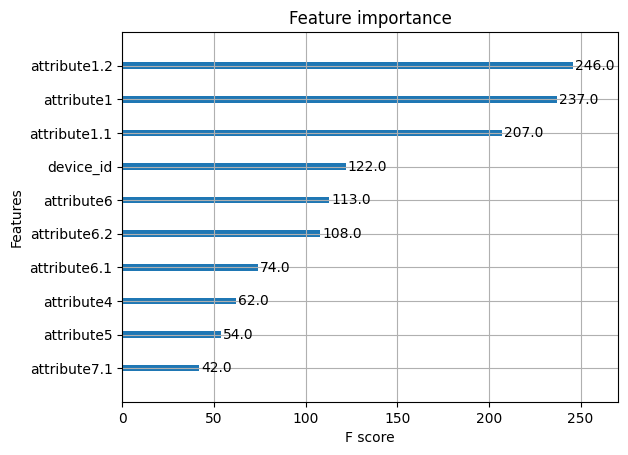

In [246]:
from xgboost import plot_importance
plot_importance(model1_lb, max_num_features=10) # top 10 most important features
plt.show()

## SVM with Lookback

In [344]:
clf_svm_lb = svm.SVC()
clf_svm_lb.fit(X_train_lb, y_train_lb)

C:\Users\flavi\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [345]:
pred_svm_lb = clf_svm_lb.predict(X_test_lb)
print(classification_report(y_test_lb, pred_svm_lb))
print(sklearn.metrics.confusion_matrix(y_test_lb, pred_svm_lb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36966
           1       0.00      0.00      0.00        32

    accuracy                           1.00     36998
   macro avg       0.50      0.50      0.50     36998
weighted avg       1.00      1.00      1.00     36998

[[36966     0]
 [   32     0]]


C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SGD with Lookback

In [346]:
clf_SGD_lb = SGDClassifier(loss="hinge", max_iter=10)
clf_SGD_lb.fit(X_train_lb, y_train_lb)

C:\Users\flavi\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\flavi\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=10)

In [347]:
pred_SGD_lb = clf_SGD_lb.predict(X_test_lb)
print(classification_report(y_test_lb, pred_SGD_lb))
print(sklearn.metrics.confusion_matrix(y_test_lb, pred_SGD_lb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36966
           1       0.00      0.00      0.00        32

    accuracy                           1.00     36998
   macro avg       0.50      0.50      0.50     36998
weighted avg       1.00      1.00      1.00     36998

[[36966     0]
 [   32     0]]


C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN with Lookback

In [348]:
neigh_lb = KNeighborsClassifier(n_neighbors=2)
neigh_lb.fit(X_train_lb, y_train_lb)

C:\Users\flavi\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [349]:
pred_neigh_lb = neigh_lb.predict(X_test_lb)
print(classification_report(y_test_lb, pred_neigh_lb))
print(sklearn.metrics.confusion_matrix(y_test_lb, pred_neigh_lb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36966
           1       0.00      0.00      0.00        32

    accuracy                           1.00     36998
   macro avg       0.50      0.50      0.50     36998
weighted avg       1.00      1.00      1.00     36998

[[36966     0]
 [   32     0]]


C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Tree with Lookback

In [350]:
clf_tree_lb = DecisionTreeClassifier(random_state=0)
clf_tree_lb.fit(X_train_lb, y_train_lb)

DecisionTreeClassifier(random_state=0)

In [351]:
pred_tree_lb = clf_tree_lb.predict(X_test_lb)
print(classification_report(y_test_lb, pred_tree_lb))
print(sklearn.metrics.confusion_matrix(y_test_lb, pred_tree_lb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36966
           1       0.07      0.06      0.07        32

    accuracy                           1.00     36998
   macro avg       0.54      0.53      0.53     36998
weighted avg       1.00      1.00      1.00     36998

[[36940    26]
 [   30     2]]


## MLP with Lookback

In [248]:
X_train_lb.shape

(86326, 30)

In [254]:
model_lb = Sequential()
model_lb.add(Dense(30, input_shape=(30, ), activation='relu'))
model_lb.add(Dense(10, activation='relu'))
model_lb.add(Dense(1, activation='sigmoid'))

In [255]:
model_lb.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model_lb.fit(X_train_lb, y_train_lb, epochs=100, validation_split=0.2,callbacks=[es])

Epoch 1/100
2159/2159 [==============================] - 3s 1ms/step - loss: 678871.4375 - accuracy: 0.9686 - val_loss: 7498.0127 - val_accuracy: 0.9984
Epoch 2/100
2159/2159 [==============================] - 2s 1ms/step - loss: 2836.1211 - accuracy: 0.9987 - val_loss: 3157.1570 - val_accuracy: 0.9986
Epoch 3/100
2159/2159 [==============================] - 2s 1ms/step - loss: 1342.1805 - accuracy: 0.9985 - val_loss: 3018.3027 - val_accuracy: 0.9986
Epoch 4/100
2159/2159 [==============================] - 2s 1ms/step - loss: 1583.4001 - accuracy: 0.9985 - val_loss: 2062.6287 - val_accuracy: 0.9986
Epoch 5/100
2159/2159 [==============================] - 2s 1ms/step - loss: 1240.4169 - accuracy: 0.9985 - val_loss: 1163.1350 - val_accuracy: 0.9986
Epoch 6/100
2159/2159 [==============================] - 2s 1ms/step - loss: 930.4875 - accuracy: 0.9983 - val_loss: 3611.5132 - val_accuracy: 0.9986
Epoch 7/100
2159/2159 [==============================] - 2s 1ms/step - loss: 601.6677 - accur

In [309]:
pred2_lb = model_lb.predict(X_test_lb)

1157/1157 [==============================] - 1s 643us/step


In [310]:
pred2_lb = np.where(pred2_lb < 0.5, 0, 1)

In [311]:
print(classification_report(np.squeeze(y_test_lb.values), pred2_lb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36966
           1       0.00      0.00      0.00        32

    accuracy                           1.00     36998
   macro avg       0.50      0.50      0.50     36998
weighted avg       1.00      1.00      1.00     36998



C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\flavi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [312]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test_lb, pred2_lb)
confusion_matrix

array([[36966,     0],
       [   32,     0]], dtype=int64)

# Comentários
## 1 - A classe de falha está totalmente desbalanceada com apenas 8% dos dados tem falha
### 1.1 - O recomendado é balancear ou utilizar uma técnica de data augmentation
## 2 - O algoritmo de Árvore (Tree) deu um resultado melhor, porém esse resultado foi apenas com dois objetos classificados como 'falha' que ele conseguiu definir corretamente, utilizando a ideia de lookback. Outro que conseguiu identificar apenas uma instância foi o XGboost sem lookback.

# Próximos passo:
## 1 - Implementar RNN para realizar a classificação com base no lookback (GRU, LSTM etc.)